<html>
    <h1>ECE 445: Machine Learning for Engineers - Albert Tran</h1>
</html>

<html>
    <h2>Mini Jupyter Exercise #2</h2>
    <p><strong>Objective</strong>: The goal of this exercise is to explore various aspects of principal components analysis (PCA)
using both synthetic data and real data.</p>
    <h3>Synthetic Data</h3>
</html>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import matrix_rank
from mpl_toolkits import mplot3d

np.random.seed(53) #Same random numbers every time
A = np.random.normal(0,1,(3,2)) #Generate random 3x2 matrix with normal random entries
print("A:", A)
print("\nRank of Matrix A: ", matrix_rank(A))

A: [[ 0.20586487  1.16676171]
 [-2.07263978 -0.63268717]
 [ 0.99712645  2.3945538 ]]

Rank of Matrix A:  2


<html>
    <h4>Generation of Dataset #1</h4>
</html>

In [2]:
x = np.zeros((500,3,1))
np.random.seed(53)
for i in range(500):
    x[i] = np.matrix(A)*np.matrix(np.random.normal(0,1,(2,1))) #x=Av
x = np.matrix(np.transpose(x))
x.shape = (3,500)

print("Dimensionality of Data Matrix X:", x.shape)
print("Dimensionality of Data Sample X[i]:", x[:,0].shape)
print("Rank of X:", matrix_rank(x))

Dimensionality of Data Matrix X: (3, 500)
Dimensionality of Data Sample X[i]: (3, 1)
Rank of X: 2


<html>
    <h4>Singular Value and Eigenvalue Decomposition of Dataset #1</h4>
</html>

In [3]:
x_u, x_sigma, x_v = np.linalg.svd(x, full_matrices = True)#X=U(SIGMA)V
x_lambda, x_q = np.linalg.eig(x*np.matrix(np.transpose(x)))#X*X^T=Q(LAMBDA)Q^-1
print("Left Singular Vectors of X:\n",x_u)
print("Eigenvectors of X*X^T:\n",x_q)

Left Singular Vectors of X:
 [[-0.32929221 -0.35219682 -0.87608449]
 [ 0.53273339 -0.83535147  0.13558416]
 [-0.77959078 -0.42207265  0.46270174]]
Eigenvectors of X*X^T:
 [[-0.32929221  0.87608449  0.35219682]
 [ 0.53273339 -0.13558416  0.83535147]
 [-0.77959078 -0.46270174  0.42207265]]


The left singular vectors of X correspond to the eigenvectors of X*X^T, although some of the vectors have been reflected.

In [4]:
print("Squared Singluar Values of X:",np.square(x_sigma))
print("Eigenvalues of X*X^T:",x_lambda)

Squared Singluar Values of X: [5.53312162e+03 1.26668331e+03 8.09051082e-30]
Eigenvalues of X*X^T: [5.53312162e+03 2.54449239e-13 1.26668331e+03]


The squared singular values of X are the same as the eigenvalues of X*X^T, since the 2.54449239e-13 is very small but due to rounding is not zero, the corresponding squared singular value is even smaller but not zero as well.

In [5]:
print("Square of the Frobenius Norm of X:",np.square(np.linalg.norm(x)))
print("Sum of Squared Singular Values of X:",sum(np.square(x_sigma)))

Square of the Frobenius Norm of X: 6799.804931975367
Sum of Squared Singular Values of X: 6799.80493197537


The energy in X equal to the sum of squared singular values of X.

While none of the singluar values of X are zero, one of them is very small compared to the other singular values which implies that is should be zero, the reason it is not zero is because of the rounding error in python. Another reason is that SVD has an error since it is a low-rank approximation of X.

The relationship between the left singular vectors of X that correspond to the 2 largest singular values and the columns of A is that they are linear combinations of each other. This is because of the way the matrix of x is generated. Since X was generated from matrix A multiplied by a vector, the singular vectors are a linear combination of the columns of A.

<html>
    <h4>PCA of Dataset #1</h4>
</html>

As discussed before, the rank of X is 2. This is because of the following theorem: <br><br>
$rank(AV) ≤ min(rank(A),rank(V))$ <br><br>
Therefore since the rank of A is 2 and the rank of V is also 2, the rank of X is 2. This means in the data matrix X (3x500), where each data sample is a column of X, one of the 3 rows is linearly dependent on the other two. This means PCA can reduce the number of rows needed from 3 to 2, since that information can be expressed by the other two rows.

Since the values of the matrix A and the matrix V were generated from a normal distrbution with an expected value of 0, X is a bivariate normal distribution with an expected value of 0.

In [6]:
print("Mean Vector of X:", x.mean(1))

Mean Vector of X: [[-0.05410283]
 [-0.02444551]
 [-0.09527569]]


The mean vector of X is shown to be small.

In [7]:
#Projection on to top 2 principal components
u = np.zeros((3,2))
s = np.zeros((2,2))

for i in range(3):
    u[i,0] = x_u[i,0] #First 2 singular vectors of U
    u[i,1] = x_u[i,1]
for i in range(2):
    s[i,i] = x_sigma[i] #Largest 2 singular values
    
w = np.matrix(u)*np.matrix(s) #Principal Component Matrix with Principal Axes as Columns
w[:,0] = w[:,0]/np.linalg.norm(w[:,0]) #Normalizing Each Principal Component
w[:,1] = w[:,1]/np.linalg.norm(w[:,1])
print("Normalized Principal Components:\n",w)

x_tilda = np.transpose(w)*x #Feature Vectors X_Tilda
x_hat = w*x_tilda #Reconstruction of data using feature vectors and principal components
print("Reconstruction Error:",np.square(np.linalg.norm(x_hat-x)))

Normalized Principal Components:
 [[-0.32929221 -0.35219682]
 [ 0.53273339 -0.83535147]
 [-0.77959078 -0.42207265]]
Reconstruction Error: 1.2092380878954102e-28


In [8]:
#Projection on to top principal component
u_1 = np.zeros((3,1))
s_1 = np.matrix([x_sigma[0]]) #Largest singular value

for i in range(3):
    u_1[i,0] = x_u[i,0] #First singular vector 1 of U
    
w_1 = np.matrix(u_1)*np.matrix(s_1) #Principal Component Matrix with Principal Axis as a Column
w_1[:,0] = w_1[:,0]/np.linalg.norm(w_1[:,0]) #Normalizing First Principal Component
print("Normalized First Principal Component:\n",w_1)

x_tilda_1 = np.transpose(w_1)*x #Feature Vectors X_Tilda
x_hat_1 = w_1*x_tilda_1 #Reconstruction of data using feature vectors and principal components
print("Reconstruction Error:",np.square(np.linalg.norm(x_hat_1-x)))
print("Square of the Second Largest Singluar Value:",np.square(x_sigma[1]))

Normalized First Principal Component:
 [[-0.32929221]
 [ 0.53273339]
 [-0.77959078]]
Reconstruction Error: 1266.6833111822234
Square of the Second Largest Singluar Value: 1266.6833111822239


Representation Error $= ||\widehat{X}-X||^{2}_F $ , is shown to be equal to the square of the second largest singluar value.

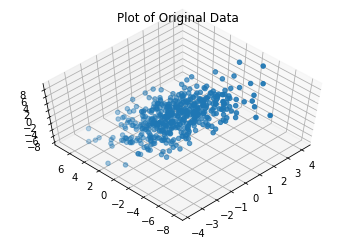

In [9]:
#Plot of Original Data
ax = plt.axes(projection='3d')
ax.scatter3D(x[0],x[1],x[2])
ax.view_init(60, 225)
ax.set_title("Plot of Original Data")
plt.show()

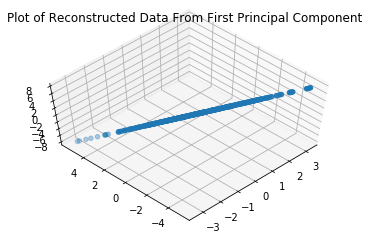

In [10]:
#Plot of Reconstructed Data From First Principal Component
ax_1 = plt.axes(projection='3d')
ax_1.scatter3D(x_hat_1[0],x_hat_1[1],x_hat_1[2])
ax_1.view_init(60, 225)
ax_1.set_title("Plot of Reconstructed Data From First Principal Component")
plt.show()

<html>
    <h4>Generation of Dataset #2</h4>
</html>

In [11]:
#Shifted Synthetic Data
x2 = np.zeros((500,3,1))
c = np.matrix(np.random.normal(0,3,(3,1)))
np.random.seed(54)  #Change the seed for v
for i in range(500):
    x2[i] = np.matrix(A)*np.matrix(np.random.normal(0,1,(2,1))) + c  #x=Av+c
x2 = np.matrix(np.transpose(x2))
x2.shape = (3,500)

print("Rank of X:", matrix_rank(x2))

Rank of X: 3


The rank of X has changed from 2 to 3 after shifting the data from the origin. A case where the rank wouldn't change would be, trivially, when c is a zero vector which would have rank 0 and no affect on the rank of X.

<html>
    <h4>PCA, Centering, and Dataset #2</h4>
</html>

In [20]:
#Finding the top 2 principal components without centering
x2_u, x2_sigma, x2_v = np.linalg.svd(x2, full_matrices = True)#X=U(SIGMA)V
u2 = np.zeros((3,2))
s2 = np.zeros((2,2))

for i in range(3):
    u2[i,0] = x2_u[i,0] #First 2 singular vectors of U
    u2[i,1] = x2_u[i,1]
for i in range(2):
    s2[i,i] = x2_sigma[i] #Largest 2 singular values
    
w2 = np.matrix(u2)*np.matrix(s2) #Principal Component Matrix with Principal Axes as Columns
w2[:,0] = w2[:,0]/np.linalg.norm(w2[:,0]) #Normalizing Each Principal Component
w2[:,1] = w2[:,1]/np.linalg.norm(w2[:,1])
#print("Normalized Principal Components:\n",w2)

x2_tilda = np.transpose(w2)*x2 #Feature Vectors X_Tilda
x2_hat = w2*x2_tilda #Reconstruction of data using feature vectors and principal components
print("Reconstruction Error:",np.square(np.linalg.norm(x2_hat-x2)))

Reconstruction Error: 211.21677280806782


Compared to the reconstruction error using Dataset #1 using 2 principal components (Error = 1.2092380878954102e-28), the reconstruction error is very large even though there are only 2 major directions of variation.

In [22]:
#Centering X and then PCA, and Reconstruction of Original Data
mean = x2.mean(1)  #Mean vector of X
for i in range(500):
    x2[:,0] = x2[:,0] - mean  #Centering X

x2_u, x2_sigma, x2_v = np.linalg.svd(x2, full_matrices = True)#X=U(SIGMA)V
u2 = np.zeros((3,2))
s2 = np.zeros((2,2))

for i in range(3):
    u2[i,0] = x2_u[i,0] #First 2 singular vectors of U
    u2[i,1] = x2_u[i,1]
for i in range(2):
    s2[i,i] = x2_sigma[i] #Largest 2 singular values
    
w2 = np.matrix(u2)*np.matrix(s2) #Principal Component Matrix with Principal Axes as Columns
w2[:,0] = w2[:,0]/np.linalg.norm(w2[:,0]) #Normalizing Each Principal Component
w2[:,1] = w2[:,1]/np.linalg.norm(w2[:,1])
#print("Normalized Principal Components:\n",w2)

x2_tilda = np.transpose(w2)*x2 #Feature Vectors X_Tilda
x2_hat = w2*x2_tilda + mean  #Reconstruction of data using feature vectors, principal components, and mean vector
print("Reconstruction Error:",np.square(np.linalg.norm(x2_hat-x2)))

[[-9.32232069e-15]
 [-9.77706804e-15]
 [-7.82165444e-14]]
Reconstruction Error: 211.21677280806782


After centering X by subtracting the mean vector from all data samples, the reconstruction error is again very small.

<html>
    <h4>Generation of Dataset #3</h4>
</html>

In [14]:
#Synthetic Data with Random Noise
x = np.zeros((500,3,1))
c = np.matrix(np.random.normal(0,3,(3,1)))
np.random.seed(55)  #Change the seed for v
for i in range(500):
    x[i] = np.matrix(A)*np.matrix(np.random.normal(0,1,(2,1))) + np.matrix(np.random.normal(0,0.01,(3,1)))  #x=Av+n
x = np.matrix(np.transpose(x))
x.shape = (3,500)

#Normalize each sample for better visualization
for i in range(500):
    x[:,i] = x[:,i]/np.linalg.norm(x[:,i])
    
print("Rank of Normalized Data:", matrix_rank(x))
x_u, x_sigma, x_v = np.linalg.svd(x, full_matrices = True)#SVD of X, X=U(SIGMA)V
print("Singular Values of Normalized X:", x_sigma)

Rank of Normalized Data: 3
Singular Values of Normalized X: [18.241753   12.93135836  0.13571491]


Since, the rank of the data is 3 and there are no zero singular values, the data is three-dimensional even though the data samples have an expected value of 0.

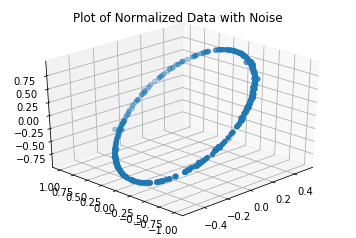

In [15]:
#Plot of Normalized Data with Noise
ax_norm = plt.axes(projection='3d')
ax_norm.scatter3D(x[0],x[1],x[2])
ax_norm.view_init(30, 225)
ax_norm.set_title("Plot of Normalized Data with Noise")
plt.show()

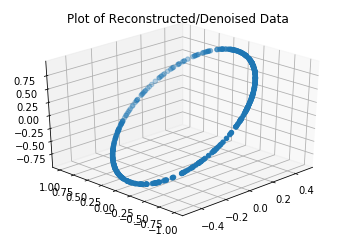

In [16]:
#Removing the noise by projecting and reconstructing X from the first two principal components
x_u, x_sigma, x_v = np.linalg.svd(x, full_matrices = True)#X=U(SIGMA)V
x_lambda, x_q = np.linalg.eig(x*np.matrix(np.transpose(x)))#X*X^T=Q(LAMBDA)Q^-1
u = np.zeros((3,2))
s = np.zeros((2,2))

for i in range(3):
    u[i,0] = x_u[i,0] #First 2 singular vectors of U
    u[i,1] = x_u[i,1]
for i in range(2):
    s[i,i] = x_sigma[i] #Largest 2 singular values
    
w = np.matrix(u)*np.matrix(s) #Principal Component Matrix with Principal Axes as Columns
w[:,0] = w[:,0]/np.linalg.norm(w[:,0]) #Normalizing Each Principal Component
w[:,1] = w[:,1]/np.linalg.norm(w[:,1])
#print("Normalized Principal Components:\n",w)

x_tilda = np.transpose(w)*x #Feature Vectors X_Tilda
x_hat = w*x_tilda #Reconstruction of data using feature vectors and principal components
#print("Reconstruction Error:",np.square(np.linalg.norm(x_hat-x)))

#Plotting the reconstructed/denoised data
ax_denoise = plt.axes(projection='3d')
ax_denoise.scatter3D(x_hat[0],x_hat[1],x_hat[2])
ax_denoise.view_init(30, 225)
ax_denoise.set_title("Plot of Reconstructed/Denoised Data")
plt.show()

In [17]:
#Reconstruction Error from Removing Noise
print("Reconstruction Error:",np.square(np.linalg.norm(x_hat-x)))
print("Square of Third Singular Value: 0.13571491^2 =", np.square(x_sigma[2]))

Reconstruction Error: 0.01841853704349179
Square of Third Singular Value: 0.13571491^2 = 0.018418537043491782


The reconstruction error from removing noise is equal to the square of the third singular value of the normalized data with noise.

<html>
    <h3>Real Data</h3>
</html>